# Homework 2

The ⁴$\text{He}$ abundance is given by mass fraction, but the others are by number. Compute the
primordial ⁴He abundance in the linear scale, $n(⁴\text{He})/n(\text{H})$, and compute the others in the log
scale where $A_\text{H}= 12$.

In [ ]:
import numpy as np
import uncertainties as un
import uncertainties.unumpy as unp

yp=un.ufloat(0.24691, 0.00018)
d_h=un.ufloat(2.57e-5, 0.13e-5)
helio3_h=un.ufloat(10.03e-6, 0.9e-6)
litio7_h=un.ufloat(4.72e-10, 0.72e-10)

razao_helio4=0.25*(yp/(1-yp))
abundancia_deuterio=unp.log10(d_h)+12
abundancia_helio3=unp.log10(helio3_h)+12
abundancia_litio=unp.log10(litio7_h)+12

print(razao_helio4)
print(abundancia_deuterio)
print(abundancia_helio3)
print(abundancia_litio)

0.08197+/-0.00008
7.410+/-0.022
7.00+/-0.04
2.67+/-0.07


Use the whole dataset to compute in the linear scale, the following quantities for (A) to (C):

A) average linear D/H value

B) median linear D/H value

C) weighted mean of linear D/H (as weights, use the square of the inverse error bars, 1/$\sigma^2$).

D) Compute the average value using only the results recommended in the last column.

E) Which value from (A) to (C) agree better with the result from (D)?

F) Which value from (A) to (C) agree better with the BBN prediction from Fields et al. (2020)?

G) Using the table above, make a plot of D/H vs. [O/H] including the error bars in D/H. Plot a horizontal
solid red line showing the central value of the BBN prediction from Fields et al. (2020) and horizontal
red dashed lines with +/- the error of the prediction. Include also a dotted blue horizontal line with your
answer from (F).

A) A média de D/H é (2.40+/-0.07)e-05
B) A mediana de D/H é (2.5+/-0.4)e-05
C) A média ponderada (pelas incertezas nas medidas) de log(D/H) é (2.46+/-0.06)e-05
D) A média de log(D/H) utilizando valores que satisfizeram o critério é (2.447+/-0.051)e-05
E) A diferença entre A) e D) é (4.219+/-8.910)e-07
   A diferença entre B) e D) é (0.309+/-3.800)e-06
   A diferença entre C) e D) é (1.518+/-7.795)e-07
   Logo o resultado de C) é o que mais concorda com D)
F) A diferença entre A) e Fields et. al (2020) é (1.657+/-1.491)e-06
   A diferença entre B) e Fields et. al (2020) é (0.926+/-3.983)e-06
   A diferença entre C) e Fields et. al (2020) é (1.083+/-1.427)e-06
   Logo o resultado de B) é o que mais concorda com Fields et. al (2020)


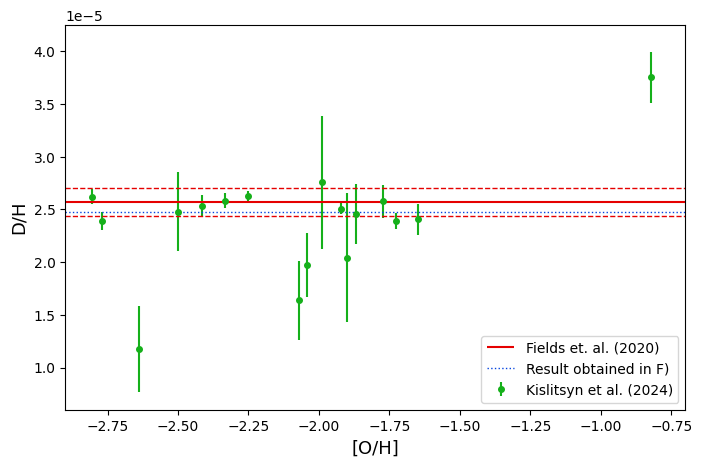

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

bbn=pd.read_csv("bbn_data.csv", names=['QSO', '[O/H]', 'log(D/H)', 'errlog(D/H)','Reference', 'Meet Criteria?'], header=0)
linear= 10**(unp.uarray(bbn['log(D/H)'], bbn['errlog(D/H)']))
print("A) A média de D/H é {:e}".format(np.mean(linear)))
print("B) A mediana de D/H é {:e}".format(np.median(linear)))

pesos=1/((10**(np.array(bbn['errlog(D/H)'])))**2)
ponderada=sum(linear*pesos)/sum(pesos)
print("C) A média ponderada (pelas incertezas nas medidas) de log(D/H) é {:e}".format(ponderada))

bbn_filtrado=bbn[bbn['Meet Criteria?'] == 1]
linear_filtrado=(10**(unp.uarray(bbn_filtrado['log(D/H)'], bbn_filtrado['errlog(D/H)'])))
print("D) A média de log(D/H) utilizando valores que satisfizeram o critério é {:.3e}".format(np.mean(linear_filtrado)))
a_d=abs(np.mean(linear) - np.mean(linear_filtrado))
b_d=abs(np.median(linear) - np.mean(linear_filtrado))
c_d=abs(ponderada - np.mean(linear_filtrado))
print("E) A diferença entre A) e D) é {:.3e}\n   A diferença entre B) e D) é {:.3e}\n   A diferença entre C) e D) é {:.3e}\n   Logo o resultado de C) é o que mais concorda com D)".format(a_d, b_d, c_d))
a_d=abs(np.mean(linear) - d_h)
b_d=abs(np.median(linear) - d_h)
c_d=abs(ponderada - d_h)
print("F) A diferença entre A) e Fields et. al (2020) é {:.3e}\n   A diferença entre B) e Fields et. al (2020) é {:.3e}\n   A diferença entre C) e Fields et. al (2020) é {:.3e}\n   Logo o resultado de B) é o que mais concorda com Fields et. al (2020)".format(a_d, b_d, c_d))


g1=plt.figure(figsize=(8,5))
plt.errorbar(np.array(bbn['[O/H]']), unp.nominal_values(linear), yerr=unp.std_devs(linear), marker='o', linestyle='', markersize=4, color='xkcd:green', label='Kislitsyn et al. (2024)')
plt.xlabel(r'[O/H]', fontsize=13)
plt.ylabel(r'D/H', fontsize=13)
plt.hlines(d_h.nominal_value,-2.9, -0.7, color='xkcd:red', label='Fields et. al. (2020)')
plt.hlines(d_h.nominal_value+d_h.std_dev,-2.9, -0.7, color='xkcd:red', linestyles='dashed', linewidth=1)
plt.hlines(d_h.nominal_value-d_h.std_dev,-2.9, -0.7, color='xkcd:red', linestyles='dashed', linewidth=1)
plt.hlines(np.median(linear).nominal_value,-2.9, -0.7, color='xkcd:blue', label='Result obtained in F)', linewidth=1, linestyles='dotted')
plt.xlim(-2.9, -0.7)
plt.ylim(0.6e-5, 4.25e-5)
plt.legend(loc='lower right')
plt.show()

Dors et al. (2022, https://ui.adsabs.harvard.edu/abs/2022MNRAS.514.5506D/abstract) estimated the
⁴$\text{He}$ abundances in both Seyfert galaxies and extragalactic star forming (SF) regions. Use the SF results
given in their table A3 (https://academic.oup.com/view-large/365429778), to estimate the primordial ⁴$\text{He}$ abundance, by performing a linear fit of $n(⁴\text{He})/n(\text{H})$. Notice that you first have to convert the log abundances given in columns 5 (oxygen) and 9 (helium) to the linear scale. The linear fit must be performed considering both error bars (in oxygen and helium). Give your resulting primordial He
abundance and error bars in:

A) linear scale, n(He)/n(H)

B) log scale, A(He)

C) mass fraction, Y

D) How your primordial A(He) compares with:

D1) the predicted primordial BBN 4He abundance (does it agree within the errors?)

D2) The solar He abundance from Asplund et al. (2021), A(He) = 10.914+/-0.013. If the abundances do not agree within the errors, explain the possible reason for the mismatch.

79.91054902724102 0.07437714125305216
Beta: [7.52681064e+01 7.11112639e-02]
Beta Std Error: [6.79133640e+00 1.98177833e-03]
Beta Covariance: [[ 1.02740995e+00 -2.19808699e-04]
 [-2.19808699e-04  8.74869817e-08]]
Residual Variance: 44.891768786750035
Inverse Condition #: 0.20852192342671924
Reason(s) for Halting:
  Sum of squares convergence


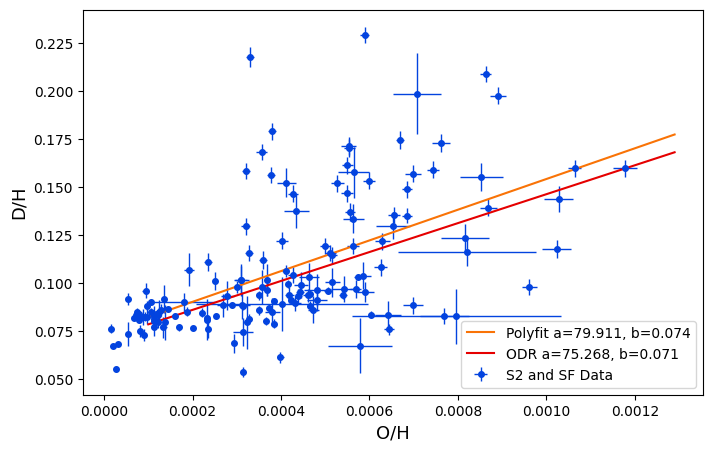

A) Fração de Hélio Primordianl em escla linear é 0.071 +-0.002
B) Abundância de Hélio Primordial é 10.852 +- 0.012
C) Abundância de Hélio Primordial é 0.221 +- 0.005


In [81]:
import scipy.odr as odrpack

def abundance_converter(data, data_type, convert_into):
    #Function that converts an abundance given in n_x/n_H, A(X)
    """"
    ARGUMENTS
    data:vector containing data points
    data_type: n_x/n_H (linear), A(X) (log)
    convert_into: desired abundance notation to be returned, n_x/n_H, A(X)

    OUTPUT
    converted: vector containing converter data points
    """
    if(data_type == 'linear'):
        if(convert_into == 'log'): 
            data=unp.log10(np.array(data))+12
            return data
        else: raise NameError('Bad data_type or convert_into argument')
    elif(data_type == 'log'):
        if(convert_into == 'linear'):
            data=(10**(-12))*(10**(np.array(data)))
            return data
        else: raise NameError('Bad convert_into argument (try linear or log)')
    else: raise NameError('Bad data_type argument (try linear or log)')


seyfert_sf=pd.read_csv('seyfert_and_sf_data.csv')

o_h= abundance_converter(unp.uarray(seyfert_sf['o_h'], seyfert_sf['erro(o_h)']), data_type='log', convert_into='linear')
heI_h=abundance_converter(unp.uarray(seyfert_sf['+he_h'], seyfert_sf['erro(+he_h)']), data_type='log', convert_into='linear')
heII_h=abundance_converter(unp.uarray(seyfert_sf['he+_h+'], seyfert_sf['erro(he+_h+)']), data_type='log', convert_into='linear')
heIII_h=abundance_converter(unp.uarray(seyfert_sf['he2+_h+'], seyfert_sf['erro(he2+_h+)']), data_type='log', convert_into='linear')

he_h=heI_h

def f(B, x): return B[0]*x + B[1]
x=np.arange(0.0001, 0.0013, 0.00001)
linear=odrpack.Model(f)
data=odrpack.RealData(unp.nominal_values(o_h), unp.nominal_values(he_h), sx=unp.std_devs(o_h), sy=unp.std_devs(he_h))
a,b=np.polyfit(unp.nominal_values(o_h), unp.nominal_values(he_h), 1)
print(a,b)
odr=odrpack.ODR(data, linear, beta0=[80,0.07])
output=odr.run()
output.pprint()

g2=plt.figure(figsize=(8,5))
plt.errorbar(unp.nominal_values(o_h), unp.nominal_values(he_h), xerr=unp.std_devs(o_h), yerr=unp.std_devs(he_h), marker='o', markersize=4, linestyle='', color='xkcd:blue', elinewidth=1, label="S2 and SF Data")
plt.plot(x, f([a,b], x), linewidth=1.5, color='xkcd:orange', label='Polyfit a={:.3f}, b={:.3f}'.format(a,b))
plt.plot(x, f([output.beta[0],output.beta[1]], x), linewidth=1.5, color='xkcd:red', label='ODR a={:.3f}, b={:.3f}'.format(output.beta[0],output.beta[1]))
plt.xlabel(r'O/H', fontsize=13)
plt.ylabel(r'D/H', fontsize=13)
plt.legend()
plt.show()

print(r"A) Fração de Hélio Primordianl em escla linear é {:.3f} +-{:.3f}".format(output.beta[1], output.sd_beta[1]))
he_h_primordial=un.ufloat(output.beta[1], output.sd_beta[1])
a_he_primordial=abundance_converter(he_h_primordial, data_type='linear', convert_into='log')
print(r"B) Abundância de Hélio Primordial é {:.3f} +- {:.3f}".format(a_he_primordial.nominal_value, a_he_primordial.std_dev))
yp=(4*he_h_primordial)/(1+4*he_h_primordial)
print(r"C) Abundância de Hélio Primordial é {:.3f} +- {:.3f}".format(yp.nominal_value, yp.std_dev))


